In [1]:
import pandas as pd
X_train = pd.read_csv('/home/yijie/kaggles/data/house_price/X_train.csv')
X_test = pd.read_csv('/home/yijie/kaggles/data/house_price/X_test.csv')
y_train = pd.read_csv('/home/yijie/kaggles/data/house_price/y_train.csv')
X_train.shape, X_test.shape, y_train.shape

((1455, 393), (1459, 393), (1455, 1))

In [48]:
# Search best params
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import norm, probplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Grid():
    def __init__(self,model):
        self.model = model
        # self.cv = cv

    def fit(self,X,y,params):
        g = GridSearchCV(self.model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
        g.fit(X,y)
        # print best strategy
        print(g.best_params_,np.sqrt(-g.best_score_))
        self.best_model_ = g.best_estimator_
        self.error_plt(X,y)
        self.error_plt(X,y,criterion= lambda x,y: abs(x-y))

    def error_plt(self,X,y,criterion= lambda x,y: (x-y)**2):
        y_predict = self.best_model_.predict(X)
        y_predict = np.exp(y_predict)
        y_true = y.to_numpy().squeeze()
        error = []
        for idx, y_pre in enumerate(y_predict):
            error.append(criterion(y_pre,y_true[idx]))
        error = np.array(error)
        print("Average Error: {}".format(np.sum(error)/len(error)))
        sns.distplot(error,fit=norm)
        fig = plt.figure()
        res = probplot(error,plot=plt)
        plt.show()
        
        

{'alpha': 0.0005, 'max_iter': 10000, 'random_state': 1} 0.10910123347649198
Average Error: 38044010502.25348


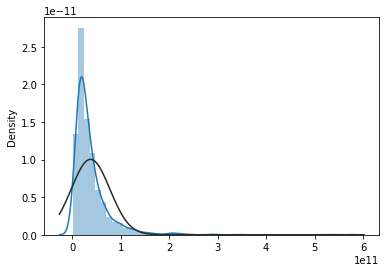

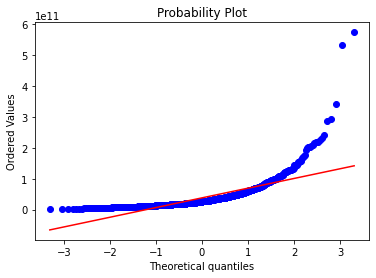

Average Error: 179649.16552486728


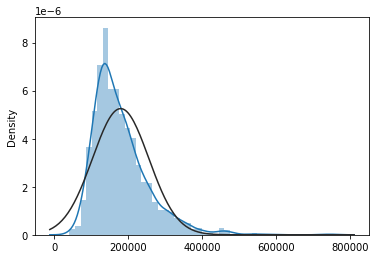

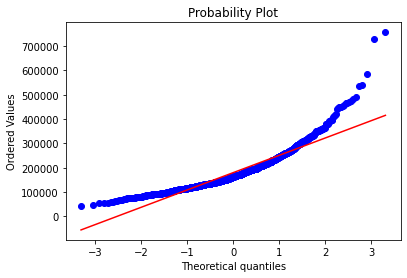

In [49]:
# Lasso
from sklearn.linear_model import Lasso
params = {'alpha': [0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],'max_iter':[10000],'random_state':[1]}
Grid(Lasso()).fit(X_train, y_train, params)

In [4]:
from sklearn.linear_model import Ridge
params = {'alpha':[100,10,1,0.1,0.01,0.001]}
Grid(Ridge()).fit(X_train, y_train, params)

{'alpha': 10} 0.11079551659814908


In [5]:
params = {'alpha':[35,30,25,20,15,10,5]}
Grid(Ridge()).fit(X_train, y_train, params)

{'alpha': 15} 0.11059349859049541


In [6]:
# Ridge
params = {'alpha':[20,19,18,17,16,15,14,13,12,11]}
Grid(Ridge()).fit(X_train, y_train, params)

{'alpha': 16} 0.11058728848781811


In [7]:
from sklearn.svm import SVR
params = {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
Grid(SVR()).fit(X_train, y_train, params)

{'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'} 0.3932365949203273
